<a href="https://colab.research.google.com/github/katygz/News-Recommendation-System-Based-on-User-History-Browsing-Clicks/blob/main/Data_Analysis_by_Katy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# News Rec-Sys Part 1

## Introduction
The background of the news recommendation system is a news app, and the goal is to **predict users' future clicking behavior based on historical browsing data, specifically the last news article clicked by the user**.

## Data Overview
User interaction data includes 300,000 users, nearly 3 million clicks, and over 360,000 different news articles, each with a corresponding embedding vector representation.

We extracted click log data from 200,000 users as the training set, 50,000 users as test set A, and 50,000 users as test set B.

# Data Tables

- train_click_log.csv: Training set user click logs
- testA_click_log.csv: Test set user click logs
- articles.csv: News article information data table
- articles_emb.csv: Embedding vector representation of news articles

|        **Field**        |         **Description**          |
| :---------------------: | :------------------------------: |
|         user_id         |              User ID             |
|    click_article_id     |            Clicked article ID    |
|     click_timestamp     |            Click timestamp        |
|    click_environment    |             Click environment     |
|    click_deviceGroup    |            Click device group     |
|        click_os         |           Click operating system  |
|      click_country      |             Click city            |
|      click_region       |             Click region          |
|   click_referrer_type   |           Click source type       |
|       article_id        | Article ID, corresponding to click_article_id |
|       category_id       |            Article type ID        |
|      created_at_ts      |          Article creation timestamp |
|       words_count       |             Article word count     |
| emb_1,emb_2,...,emb_249 |      Article embedding vector representation |

## Evaluation Metrics
The final submission format for each user will include five recommended articles, sorted by click probability.

There is only one correct answer for each user's last clicked article, so we check if any of the recommended five articles match the actual answer.

For example, for user1, our submission would be:
> user1, article1, article2, article3, article4, article5.

The evaluation metric formula is as follows:
$$
score(user) = \sum_{k=1}^5 \frac{s(user, k)}{k}
$$

If article1 is the actual article clicked by the user, then s(user1,1)=1, and s(user1,2-4) are all 0. If article2 is the article clicked by the user, then s(user,2)=1/2, and s(user,1,3,4,5) are all 0. Thus, score(user)=the reciprocal of the rank at which the match occurs. If there are no matches, score(user1)=0. This is reasonable because we want hits to be as high-ranking as possible, which yields a higher score.

## Project Understanding
Based on the project introduction, we first need to clarify the goal: **predict the last news article clicked by users based on their historical browsing data.** From this goal, it is evident that this project differs from the typical structured projects we've encountered for two main reasons:

- Firstly, the objective is to predict the last clicked news article, meaning we are recommending news articles rather than predicting a number or classifying data.
- Secondly, the data presented is not the typical feature + label data we've encountered before; it is based on real business scenarios, derived from user click logs.

With this problem statement, our thought process is to combine our goals and **transform this prediction problem into a supervised learning problem (features + labels), enabling us to conduct ML, DL, and other modeling predictions.**

Consequently, we should naturally have several questions in mind:

- How to transform it into a supervised learning problem?
- What kind of supervised learning problem should it be transformed into?
- What features can we utilize?
- What models can we try?
- What strategies do we have for recommending tens of thousands of articles?

Of course, these questions won't yield immediate answers upon first seeing the project, but as soon as we have questions, we can devise ways to solve them. For instance, regarding the second question about what kind of supervised learning problem it should become:

Since we are predicting the last news article clicked by users from 360,000 articles, we might first consider this a multi-class problem (choosing 1 from 360,000 classes). However, such a vast classification problem could be challenging. Is there a way to transform it?

Since we aim to predict the last clicked article, if we can predict the probability that a certain user will click on a particular article, wouldn't that indirectly solve the problem? The article with the highest probability would be the one the user is most likely to click last. This way, we transform the original problem into a click-through rate prediction problem (user, article) → probability of click (soft classification), which aligns with the classification problems familiar to us in supervised learning. Thus, our model selection moving forward can be broadly directed, such as opting for the simplest logistic regression model.

In this way, we should have a general solution approach for the project, first converting it into a classification problem, where the classification label is whether the user will click on a particular article. The features of the classification problem will include the user and the article. We need to train a classification model to predict the probability of a particular user clicking on a specific article. This raises several additional questions: How to transform it into a supervised learning problem? How to create training and testing datasets? What features can we leverage? What models can we attempt? With 360,000 articles and over 200,000 users, what strategies do we have to reduce the problem's scale? How do we make the final predictions?

## Data Preprocessing & Data Analysis

**Step 1: User Attribute Analysis**

- **User Count Distribution**: Analyze the number of users included in the training and testing sets through visualization to understand the overall scale of user data.
- **User City Distribution Patterns**: Analyze the geographical distribution of users through city-level data visualization, exploring whether there are regional concentrations or dispersions.
- **Average Click Count per User**: Calculate the average article click count for each user and present it through charts to understand user activity distribution.
- **Correlation Between Click Source and Article Click Count**: Analyze the relationship between different click sources (e.g., homepage recommendations, search results) and article click counts, determining whether behavioral patterns differ among users from different sources.

**Step 2: User Behavior Analysis**

- **Time Patterns of User Click Behavior**: Analyze users' continuous click behavior through visualizations of timestamp data, checking if reading habits or continuous clicking patterns can be identified from click intervals.
- **Similarity Between Articles**: Analyze whether there is content similarity when users read different articles, using the user's click sequence for article similarity analysis and visualization.
- **Correlation Between Click Source and Article Type**: Analyze the relationship between the source of user clicks (e.g., recommendations, searches) and article types (e.g., news, entertainment, technology) to explore whether there are differences in user preferences across sources.

**Step 3: Article Content Analysis**

- **Correlation Between Article Length and Click Count**: Analyze the relationship between article length and click count to determine whether article length impacts click volume, with visualizations of the correlation.
- **Clustering and Dimensionality Reduction Visualization of Article Embedding Vectors**: Use article embedding vectors for similarity calculations, attempt to cluster articles, and visualize clustering results using dimensionality reduction techniques (e.g., PCA or t-SNE) to intuitively display content similarities between articles.
- **Correlation Between Article Creation Time and Click Time**: Analyze the relationship between article creation time and user click time, determining if specific time periods lead to higher article clicks and visualizing the relationship between time intervals and click behavior.



## Importing Packages

In [2]:
# %matplotlib inline  # Display plot results in Jupyter Notebook

import pandas as pd  # Import the pandas library for data processing and analysis
import numpy as np  # Import the NumPy library for numerical calculations

import matplotlib.pyplot as plt  # Import the matplotlib library for data visualization
import seaborn as sns  # Import the seaborn library for more aesthetically pleasing data visualization
plt.rc('font', family='SimHei', size=13)  # Set the font to SimHei (Chinese Black) with a font size of 13

import os  # Import the os module for operating system-related functions
import gc  # Import the gc module for garbage collection
import re  # Import the re module for regular expression operations
import warnings  # Import the warnings module to ignore warning messages
import sys  # Import the sys module to access system-related functions

warnings.filterwarnings("ignore")  # Ignore warning messages


## Reading Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/gz/推荐系统/data/data_raw/'
save_path = '/content/drive/My Drive/gz/推荐系统/data/temp_results/'



#####train
trn_click = pd.read_csv(data_path+'train_click_log.csv')
item_df = pd.read_csv(data_path+'articles.csv')
item_df = item_df.rename(columns={'article_id': 'click_article_id'})  #Rename
item_emb_df = pd.read_csv(data_path+'articles_emb.csv')

#####test
tst_click = pd.read_csv(data_path+'testA_click_log.csv')

## Data Preprocessing
Calculate user click ranks and click counts.

In [ ]:
trn_click.head()

,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,199999,160417,1507029570190,4,1,17,1,13,1
1,199999,5408,1507029571478,4,1,17,1,13,1
2,199999,50823,1507029601478,4,1,17,1,13,1
3,199998,157770,1507029532200,4,1,17,1,25,5
4,199998,96613,1507029671831,4,1,17,1,25,5


In [ ]:
# Sort the click timestamps for each user.
trn_click['rank'] = trn_click.groupby(['user_id'])['click_timestamp'].rank(ascending=False).astype(int)
tst_click['rank'] = tst_click.groupby(['user_id'])['click_timestamp'].rank(ascending=False).astype(int)

In [ ]:
trn_click[trn_click['user_id'] == 199999]

,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,rank
0,199999,160417,1507029570190,4,1,17,1,13,1,11
1,199999,5408,1507029571478,4,1,17,1,13,1,10
2,199999,50823,1507029601478,4,1,17,1,13,1,9
211041,199999,123909,1507226987864,4,1,17,1,13,1,8
211042,199999,168623,1507227017864,4,1,17,1,13,1,7
660731,199999,161191,1507665351186,4,1,17,1,13,1,6
660732,199999,42223,1507665381186,4,1,17,1,13,1,5
709171,199999,70214,1507721405411,4,1,17,1,13,1,4
709172,199999,156843,1507721435411,4,1,17,1,13,1,3
1081894,199999,159019,1508176837088,4,1,17,1,13,1,2


In [ ]:
#Count the number of articles clicked by each user and add a new column named "count."

trn_click['click_cnts'] = trn_click.groupby(['user_id'])['click_timestamp'].transform('count')
tst_click['click_cnts'] = tst_click.groupby(['user_id'])['click_timestamp'].transform('count')

## Data Browsing

### User Click Log File - Training Set

In [ ]:
trn_click = trn_click.merge(item_df, how='left', on=['click_article_id'])
trn_click.head()

,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,rank,click_cnts,category_id,created_at_ts,words_count
0,199999,160417,1507029570190,4,1,17,1,13,1,11,11,281,1506942089000,173
1,199999,5408,1507029571478,4,1,17,1,13,1,10,11,4,1506994257000,118
2,199999,50823,1507029601478,4,1,17,1,13,1,9,11,99,1507013614000,213
3,199998,157770,1507029532200,4,1,17,1,25,5,40,40,281,1506983935000,201
4,199998,96613,1507029671831,4,1,17,1,25,5,39,40,209,1506938444000,185


#### Meanings of Each Field in the train_click_log.csv File

1. user_id: Unique identifier for the user
2. click_article_id: Unique identifier for the article clicked by the user
3. click_timestamp: Timestamp when the user clicked the article
4. click_environment: Environment in which the user clicked the article
5. click_deviceGroup: Device group used by the user to click the article
6. click_os: Operating system used by the user when clicking the article
7. click_country: Country where the user was located when clicking the article
8. click_region: Region where the user was located when clicking the article
9. click_referrer_type: Source of the article when the user clicked on it

In [ ]:
#User click log information
trn_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112623 entries, 0 to 1112622
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   user_id              1112623 non-null  int64
 1   click_article_id     1112623 non-null  int64
 2   click_timestamp      1112623 non-null  int64
 3   click_environment    1112623 non-null  int64
 4   click_deviceGroup    1112623 non-null  int64
 5   click_os             1112623 non-null  int64
 6   click_country        1112623 non-null  int64
 7   click_region         1112623 non-null  int64
 8   click_referrer_type  1112623 non-null  int64
 9   rank                 1112623 non-null  int64
 10  click_cnts           1112623 non-null  int64
 11  category_id          1112623 non-null  int64
 12  created_at_ts        1112623 non-null  int64
 13  words_count          1112623 non-null  int64
dtypes: int64(14)
memory usage: 118.8 MB


In [ ]:
# The number of users in the training set is 200,000
trn_click.user_id.nunique()

200000

In [ ]:
trn_click.groupby('user_id')['click_article_id'].count().min()  # Each user in the training set clicked on at least two articles.

2

##### A histogram will be created to provide a general view of the basic attribute distribution.

In [ ]:
# Change the Font to Chinese because there is Chinese Font in matplotlib

!wget -q -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

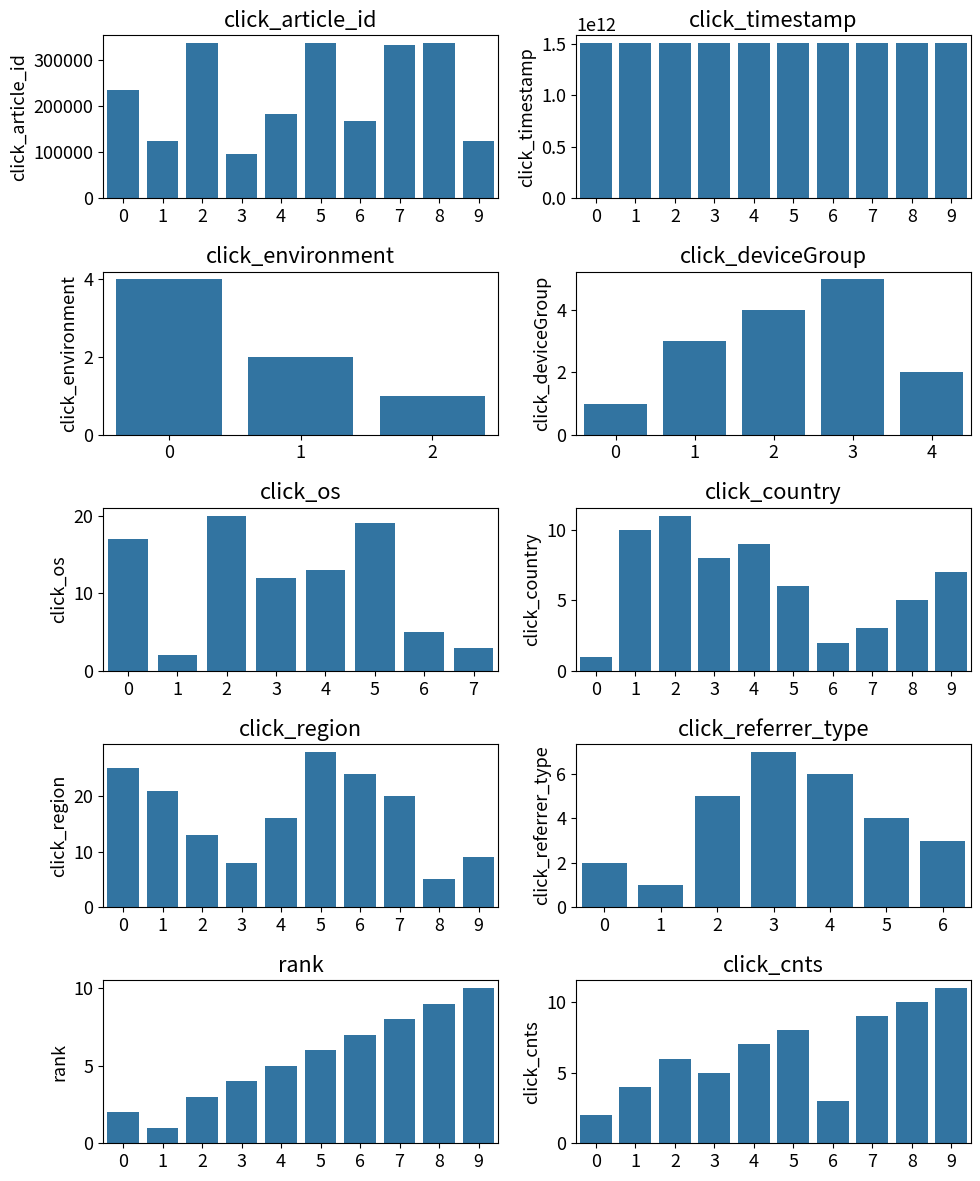

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_bar_chart(data, column, ax):
    """
    Draw a bar chart
    """
    value_counts = data[column].value_counts().reset_index()[:10]
    sns.barplot(x=value_counts.index, y=value_counts[column], ax=ax)
    for item in ax.get_xticklabels():
        item.set_rotation(0)
    ax.set_title(column)
    ax.set_xlabel('')

# Create a new figure window
fig, axes = plt.subplots(5, 2, figsize=(10, 12))

# Place subplots in a 5x2 grid
for i, column in enumerate(['click_article_id', 'click_timestamp', 'click_environment', 'click_deviceGroup',
                            'click_os', 'click_country', 'click_region', 'click_referrer_type', 'rank', 'click_cnts']):
    plot_bar_chart(trn_click, column, axes[i//2, i%2])

plt.tight_layout()
plt.show()


In [ ]:
trn_click['click_deviceGroup'].value_counts(normalize = True)

,proportion
click_deviceGroup,
1,0.609539
3,0.355518
4,0.034811
5,0.000127
2,0.000005


From the click device group analysis, Device 1 accounts for the majority at 61%, while Device 3 comprises 36%.

### Test set user click logs

In [ ]:
tst_click = tst_click.merge(item_df, how='left', on=['click_article_id'])
tst_click.head()

,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,rank,click_cnts,category_id,created_at_ts,words_count
0,249999,160974,1506959142820,4,1,17,1,13,2,19,19,281,1506912747000,259
1,249999,160417,1506959172820,4,1,17,1,13,2,18,19,281,1506942089000,173
2,249998,160974,1506959056066,4,1,12,1,13,2,5,5,281,1506912747000,259
3,249998,202557,1506959086066,4,1,12,1,13,2,4,5,327,1506938401000,219
4,249997,183665,1506959088613,4,1,17,1,15,5,7,7,301,1500895686000,256


In [ ]:
set(trn_click.user_id) & set(tst_click.user_id)

set()

The users in the training and testing sets are completely distinct (with no overlap). User IDs in the training set range from 0 to 199,999, while user IDs in test set A range from 200,000 to 249,999. Therefore, during training, it is essential to include data from the test set, referred to as the complete dataset.

In [ ]:
#The number of users in the test set is 50,000.
tst_click.user_id.nunique()

50000

In [ ]:
tst_click.groupby('user_id')['click_article_id'].count().min() # 注意测试集里面有只点击过一次文章的用户

1

### News article information data table



In [ ]:
#The browsing of the news article dataset
pd.concat([item_df.head(),item_df.tail()])

,click_article_id,category_id,created_at_ts,words_count
0,0,0,1513144419000,168
1,1,1,1405341936000,189
2,2,1,1408667706000,250
3,3,1,1408468313000,230
4,4,1,1407071171000,162
364042,364042,460,1434034118000,144
364043,364043,460,1434148472000,463
364044,364044,460,1457974279000,177
364045,364045,460,1515964737000,126
364046,364046,460,1505811330000,479


#### Article Word Count

1. Overall Distribution of Article Lengths

We need to examine whether shorter articles are more prevalent or if longer articles dominate. It's also important to check for any outliers or ranges where word counts are concentrated. If shorter articles are more common, it may indicate that content consumption on the platform tends to favor quick browsing. Conversely, a higher number of longer articles could suggest that users have a certain demand for in-depth reading.

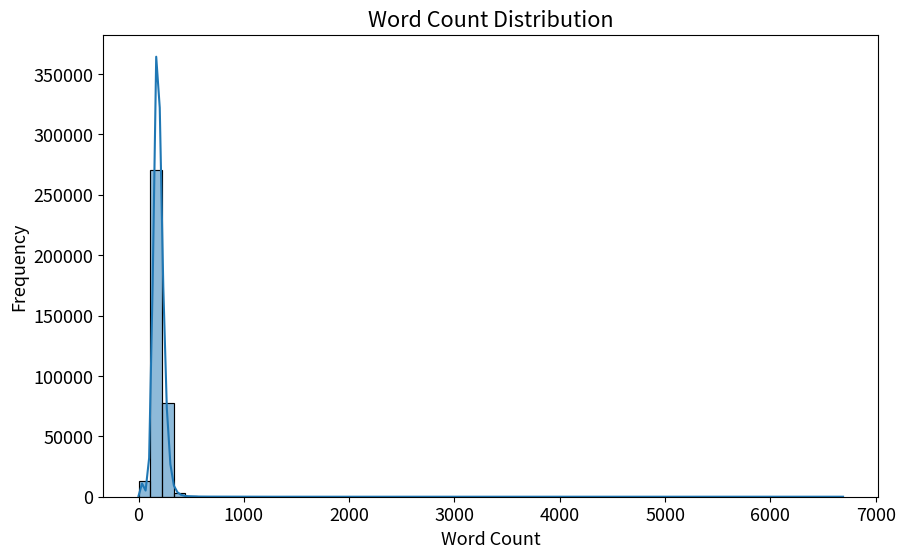

In [ ]:
# Plot word count distribution
plt.figure(figsize=(10, 6))
sns.histplot(item_df['words_count'], bins=60, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

<Axes: >

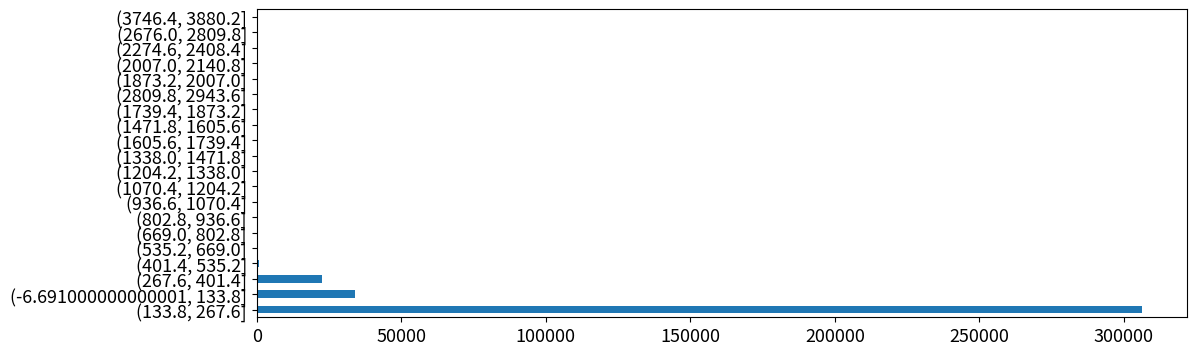

In [ ]:
# We can also use value_counts for binning
item_df['words_count'].value_counts(bins = 50)[:20].plot(kind = 'barh',rot = 0, figsize = [12,4])

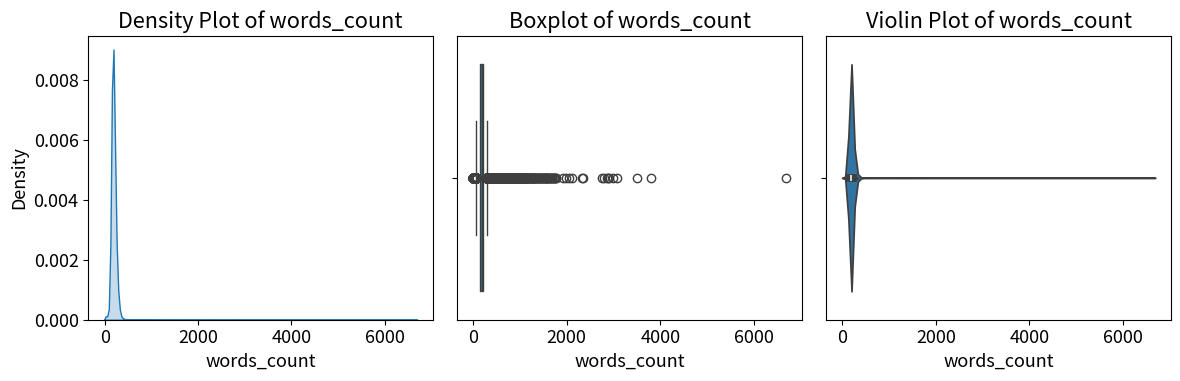

In [ ]:
# for more complex visualizations

def plot_distribution(data, column):
    """
    Draw three types of charts to show data distribution: Kernel Density Estimate (KDE), Boxplot, and Violin Plot.

    Parameters:
    - data: DataFrame containing the data for the distribution plots
    - column: str, the name of the column to be plotted
    """
    plt.figure(figsize=(12, 4))

    # Kernel Density Estimate Plot
    plt.subplot(1, 3, 1)
    sns.kdeplot(data[column], shade=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title('Density Plot of ' + column)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column])
    plt.xlabel(column)
    plt.title('Boxplot of ' + column)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=data[column])
    plt.xlabel(column)
    plt.title('Violin Plot of ' + column)

    plt.tight_layout()
    plt.show()

plot_distribution(item_df, 'words_count')


2. The relationship between word count and publication time seeks to determine if there is a trend in article lengths over different time periods. If a change in word count is observed over time, it may indicate a shift in the platform's content strategy or a change in user preferences for shorter or longer articles.

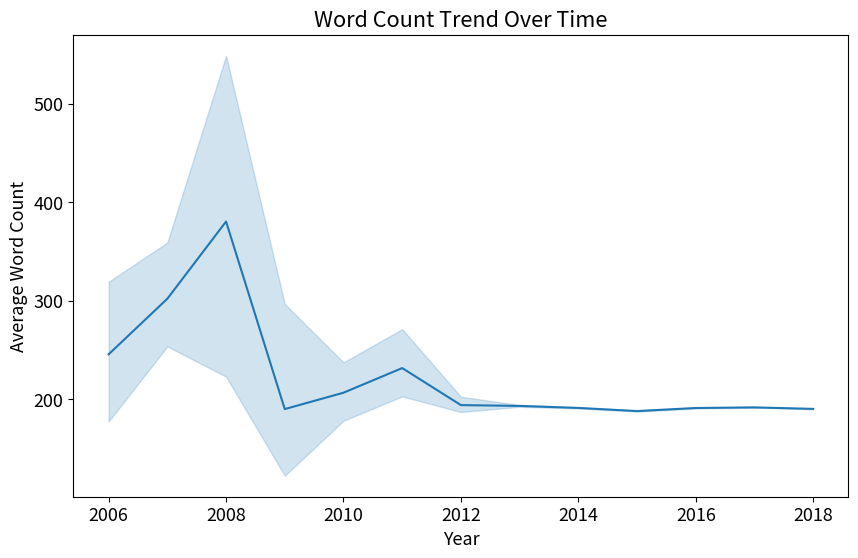

In [ ]:
# Convert timestamps to date format
item_df['created_at'] = pd.to_datetime(item_df['created_at_ts'], unit='ms')

# Analyze trends in word counts by year
item_df['year'] = item_df['created_at'].dt.year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='words_count', data=item_df)
plt.title('Word Count Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Average Word Count')
plt.show()

3. Examine the relationship between word counts and article types (category_id). This will visually reveal the distribution of word counts across different categories, helping to understand whether certain types of articles have more concentrated or dispersed word counts.

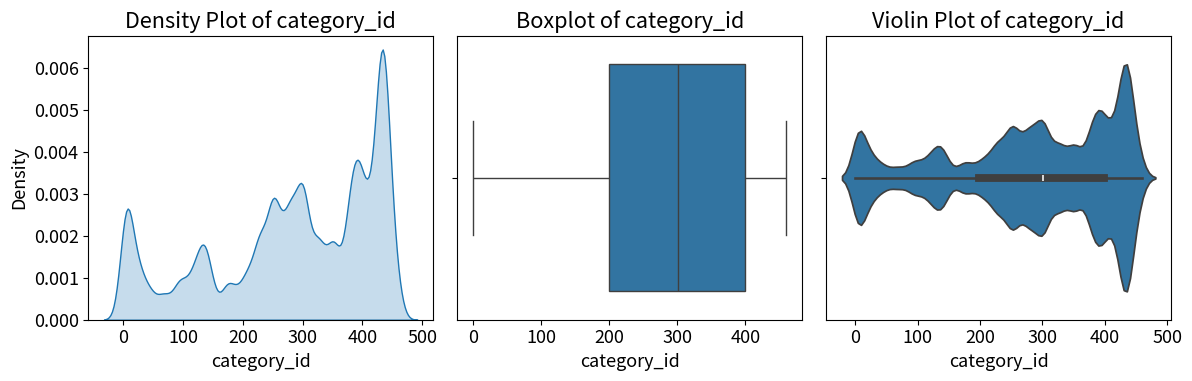

In [ ]:
#  Group by category and plot box plots to view word count distribution
plot_distribution(item_df, 'category_id')

### Embedding Vector Representation of News Articles

The embedding vector representation of news articles refers to the process of representing each news article as a fixed-length vector. This vector is typically obtained by mapping the words or other semantic units in the article to real-valued vectors in a high-dimensional space. The purpose of this representation is to encode the semantic information of the article in vector form.

Assuming we have the following two news articles:

Article A: "Scientists discover a new vaccine that can effectively prevent influenza."  
Article B: "National policies are introduced to encourage companies to increase environmental investment."

We can use pre-trained word embedding models (e.g., Word2Vec, GloVe, or FastText) to map each word to a fixed-length vector. Let's assume our word embedding model produces 100-dimensional vectors.

Then, we can compute the embedding vector for each article using several methods:

1. **Average Vector**: Compute the average of the vectors of each word in the article to obtain the article's embedding vector.
2. **Weighted Average Vector**: Compute a weighted average of the vectors of each word in the article, with weights based on values like TF-IDF.
3. **Model Encoding**: Use deep learning models (e.g., recurrent neural networks, Transformers) to encode the entire article into a fixed-length vector.

Assuming we use the average vector method, the word vectors in Article A are as follows (for simplicity, let's assume the vector dimension is 3):

- "Scientists": [0.2, 0.1, 0.5]
- "Discover": [0.3, 0.2, 0.4]
- "New": [0.1, 0.4, 0.3]
- "Vaccine": [0.5, 0.6, 0.2]
... (vectors for other words)

The embedding vector for Article A can be obtained by averaging these word vectors.

In [ ]:
import nltk
import numpy as np

# Download the necessary NLTK data
nltk.download('punkt')

# Article content
article = "This week’s White House Report Card capped an eventful week that showed inflation was still hot, a major pollster predicting President Joe Biden’s reelection defeat, and Russian President Vladimir Putin offering an unwelcome election endorsement."

# Tokenization
tokens = nltk.word_tokenize(article)

# Build a simple word embedding dictionary (randomly generated vectors)
embedding_dim = 100  # Assume the word embedding vector dimension is 100
word_embeddings = {}
for word in set(tokens):
    word_embeddings[word] = np.random.rand(embedding_dim)

# Get the embedding vector for each word
word_vectors = [word_embeddings[word] for word in tokens if word in word_embeddings]

# Calculate the embedding vector for the entire article (taking the average)
article_embedding = sum(word_vectors) / len(word_vectors)

print("Embedding vector of the article:", article_embedding)


文章的embedding向量： [0.53849099 0.48803937 0.51478058 0.48569987 0.52021112 0.56448735
 0.5099309  0.51797524 0.49313013 0.50524184 0.48417712 0.47403192
 0.5456544  0.4966045  0.5634388  0.436503   0.41665486 0.50594566
 0.48812994 0.57219323 0.57656182 0.43134354 0.42449562 0.45136461
 0.56311368 0.55639194 0.40187239 0.48435968 0.55673189 0.55949973
 0.47760871 0.52535811 0.52373415 0.49429134 0.47371833 0.43487876
 0.47648019 0.45953053 0.46079711 0.52716719 0.43672169 0.54499977
 0.46367436 0.48973902 0.39458431 0.49741967 0.42686008 0.54782434
 0.57132868 0.46500518 0.47373299 0.48499219 0.42964002 0.49764665
 0.57556385 0.46200725 0.49346044 0.56878258 0.54270333 0.42435506
 0.51104936 0.5323996  0.45450121 0.41616108 0.54475238 0.53716638
 0.47816501 0.3794141  0.49510999 0.53313648 0.4859236  0.55667053
 0.47870995 0.51886342 0.53162699 0.49979225 0.50832748 0.49646421
 0.52280595 0.49328224 0.52805774 0.51973857 0.57039155 0.50968603
 0.51725791 0.47094975 0.52349126 0.56064828 0

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
item_emb_df.head()

,article_id,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_240,emb_241,emb_242,emb_243,emb_244,emb_245,emb_246,emb_247,emb_248,emb_249
0,0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,...,-0.487843,0.823124,0.412688,-0.338654,0.320786,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292


In [ ]:
item_emb_df.shape

(364047, 251)

## Data Analysis

### User Repeated Clicks

In [ ]:
#####merge
user_click_merge = pd.concat([trn_click,tst_click])

In [ ]:
#User Repeated Clicks
user_click_count = user_click_merge.groupby(['user_id', 'click_article_id'])['click_timestamp'].agg({'count'}).reset_index()
user_click_count[:10]

,user_id,click_article_id,count
0,0,30760,1
1,0,157507,1
2,1,63746,1
3,1,289197,1
4,2,36162,1
5,2,168401,1
6,3,36162,1
7,3,50644,1
8,4,39894,1
9,4,42567,1


In [ ]:
user_click_count[user_click_count['count']>7]

,user_id,click_article_id,count
311242,86295,74254,10
311243,86295,76268,10
393761,103237,205948,10
393763,103237,235689,10
576902,134850,69463,13


In [ ]:
#User Repeated Clicks
user_click_count.loc[:,'count'].value_counts()

,count
count,
1,1605541
2,11621
3,422
4,77
5,26
6,12
10,4
7,3
13,1


It can be observed that 1,605,541 users (approximately 99.2%) have not repeatedly read any articles, with only a very small number of users clicking on the same article multiple times. This can also be treated as a separate feature.

### Analyze the distribution of the number of news articles clicked by users

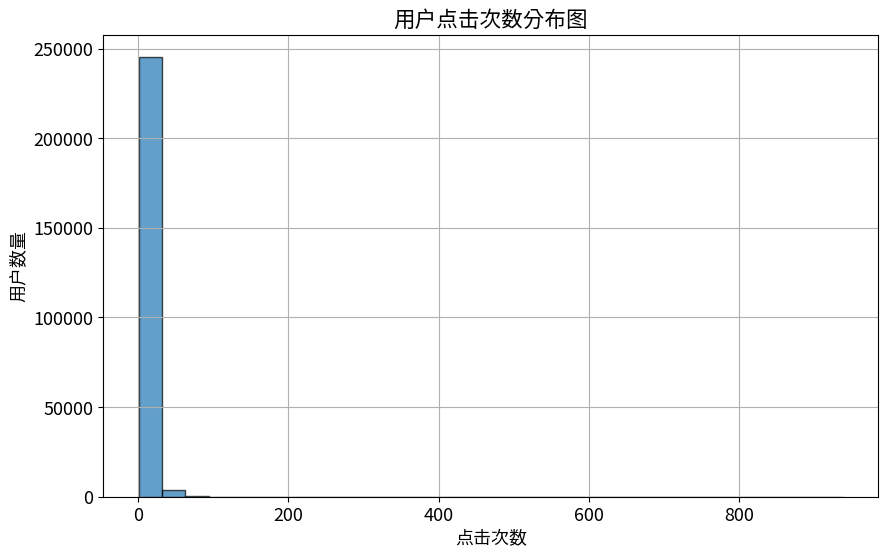

In [ ]:
# Generate cumulative click count distribution
user_click_item_count = sorted(user_click_merge.groupby('user_id')['click_article_id'].count(), reverse=True)

# Plot the cumulative distribution chart
plt.figure(figsize=(10, 6))
plt.hist(user_click_item_count, bins=30, edgecolor='black', alpha=0.7)
plt.title('User Click Count Distribution')
plt.xlabel('Number of Clicks')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


Users' activity levels can be assessed based on the number of articles they click on.

9.0
2.0


Text(0, 0.5, '用户数量')

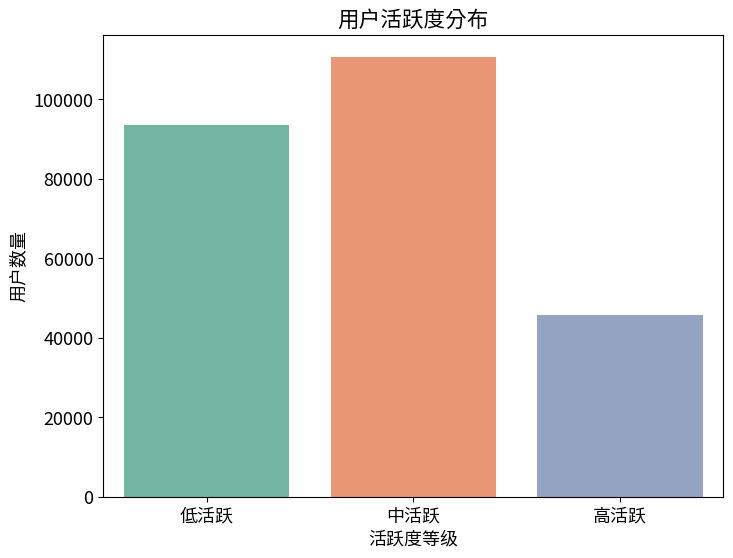

In [ ]:
user_click_item_count_series = pd.Series(user_click_item_count)

threshold_high = user_click_item_count_series.quantile(0.8)
print(threshold_high)
threshold_low = user_click_item_count_series.quantile(0.2)
print(threshold_low)

user_activity_level = pd.cut(user_click_item_count_series, bins=[0, threshold_low, threshold_high, float('inf')], labels=['Low Activity', 'Medium Activity', 'High Activity'])

activity_df = pd.DataFrame({'Activity Level': user_activity_level})

# Plot the distribution of activity levels as a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=activity_df, x='Activity Level', palette='Set2', order=['Low Activity', 'Medium Activity', 'High Activity'])

# Add title and labels
plt.title('User Activity Level Distribution')
plt.xlabel('Activity Level')
plt.ylabel('Number of Users')


In [ ]:
all(clicks > 100 for clicks in user_click_item_count[:50])

True

The top 50 users by click count all have over 100 clicks. We can define users with 100 or more clicks as active users. This is a straightforward approach to assessing user activity. For a more comprehensive evaluation, we will also consider click timestamps. Later, we will assess user activity levels based on both click counts and click times.

In [ ]:
print(f"点击次数小于等于两次的用户数量为: {(user_click_item_count_series <= 2).sum()}")

点击次数小于等于两次的用户数量为: 93464


It can be observed that there are many users with click counts less than or equal to two, and these users can be considered inactive users

### News Click Count Analysis

In [ ]:
user_click_merge

,user_id,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type,rank,click_cnts,category_id,created_at_ts,words_count
0,199999,160417,1507029570190,4,1,17,1,13,1,11,11,281,1506942089000,173
1,199999,5408,1507029571478,4,1,17,1,13,1,10,11,4,1506994257000,118
2,199999,50823,1507029601478,4,1,17,1,13,1,9,11,99,1507013614000,213
3,199998,157770,1507029532200,4,1,17,1,25,5,40,40,281,1506983935000,201
4,199998,96613,1507029671831,4,1,17,1,25,5,39,40,209,1506938444000,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518005,221924,70758,1508211323220,4,3,2,1,25,2,1,14,136,1508188164000,282
518006,207823,331116,1508211542618,4,3,2,1,25,1,4,14,436,1508077619000,144
518007,207823,234481,1508211850103,4,3,2,1,25,1,3,14,375,1508181572000,212
518008,207823,211442,1508212189949,4,3,2,1,25,1,2,14,340,1508187720000,240


In [ ]:
item_click_count = sorted(user_click_merge.groupby('click_article_id')['click_timestamp'].count(), reverse=True)

Common analysis directions include the distribution of click counts, statistics on popular articles, and long-tail effects.

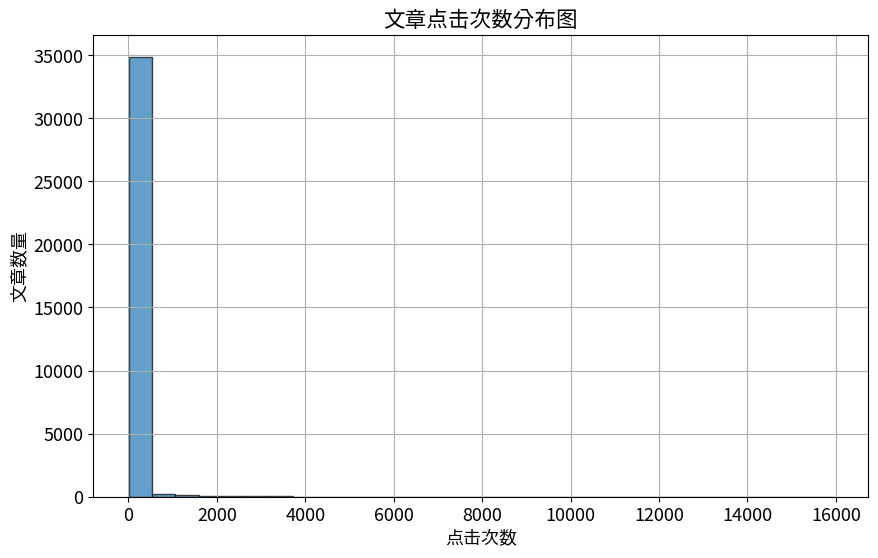

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(item_click_count, bins=30, edgecolor='black', alpha=0.7)
plt.title('Article Click Count Distribution')
plt.xlabel('Click Counts')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In the article click count data, it is common to observe the following phenomena:

- A small number of articles receive very high click volumes (such as viral articles).
- Most articles have low click counts, possibly only 1 or 2 clicks (the long-tail effect).

In a conventional histogram, articles with very high click counts may "compress" those with lower counts. Logarithmic transformation can be applied to click counts to make these significantly different data points more comparable.

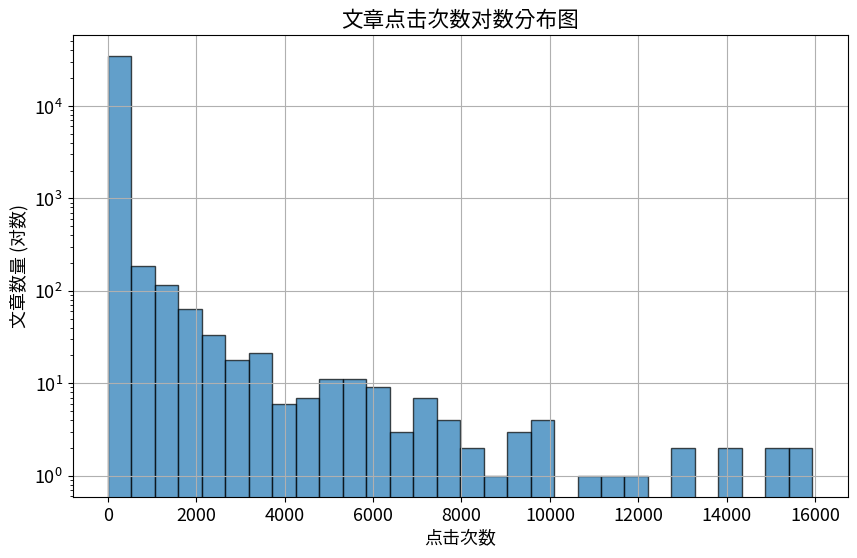

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(item_click_count, bins=30, edgecolor='black', alpha=0.7, log=True)
plt.title('Logarithmic Distribution of Article Click Counts')
plt.xlabel('Click Counts')
plt.ylabel('Number of Articles (Logarithmic)')
plt.grid(True)
plt.show()



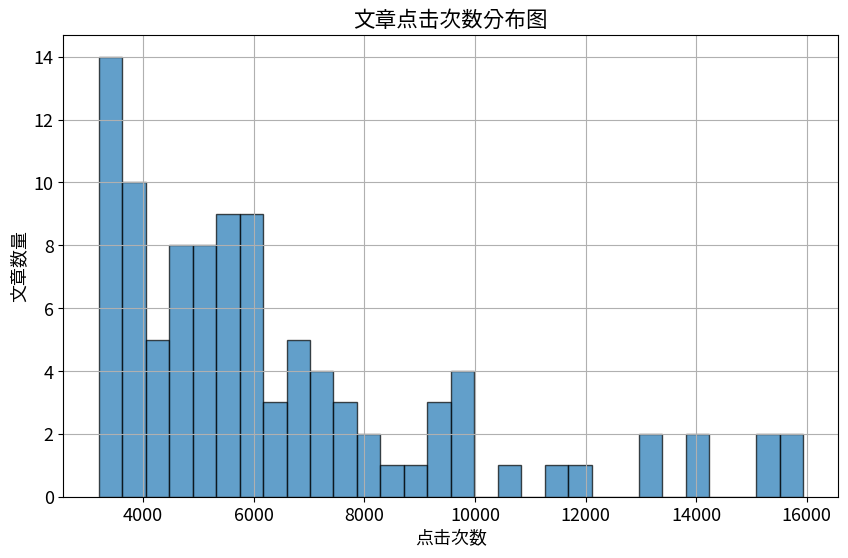

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(item_click_count[:100], bins=30, edgecolor='black', alpha=0.7)
plt.title('Article Click Count Distribution')
plt.xlabel('Click Counts')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


It can be observed that the top 100 articles with the most clicks have click counts greater than 4000.

In [ ]:
# Get the top 10 articles with the highest click counts
top_10_articles = item_click_count[:10]

print("Click counts for the top 10 articles are as follows:")
for i, count in enumerate(top_10_articles, 1):
    print(f"Article {i} click count: {count}")



点击次数最多的前10篇文章点击次数分别为：
第 1 篇文章点击次数：15935
第 2 篇文章点击次数：15666
第 3 篇文章点击次数：15383
第 4 篇文章点击次数：15170
第 5 篇文章点击次数：14009
第 6 篇文章点击次数：13998
第 7 篇文章点击次数：13277
第 8 篇文章点击次数：13041
第 9 篇文章点击次数：11968
第 10 篇文章点击次数：11511



The top 20 articles with the most clicks have click counts greater than 2500. This can be defined as "popular news," which is a straightforward approach. Later, we will also categorize article popularity based on click counts and timestamps.

Additionally, it's essential to check articles with very few clicks to analyze whether there is a significant long-tail effect, where many articles have extremely low click volumes.

In [ ]:
# Count the number of articles with click counts less than or equal to 2
low_click_count_articles = sum(clicks <= 2 for clicks in item_click_count)

print(f"The number of articles with click counts less than or equal to 2 is: {low_click_count_articles}")


点击次数少于等于2次的文章数量为: 22408


It can be observed that many news articles have only been clicked one or two times. This leads to the idea of defining these articles as "obscure news."

### The co-occurrence frequency of news articles:
 refers to the number of times two articles appear consecutively in a user's click behavior.

This analysis can reveal user reading habits and preferences. If certain articles are frequently clicked together, it may indicate a thematic, content, or temporal correlation between them.

In [ ]:
tmp = user_click_merge.sort_values('click_timestamp')
tmp['next_item'] = tmp.groupby(['user_id'])['click_article_id'].transform(lambda x:x.shift(-1))
union_item = tmp.groupby(['click_article_id','next_item'])['click_timestamp'].agg({'count'}).reset_index().sort_values('count', ascending=False)
union_item[['count']].describe()

,count
count,433597.000000
mean,3.184139
std,18.851753
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2202.000000


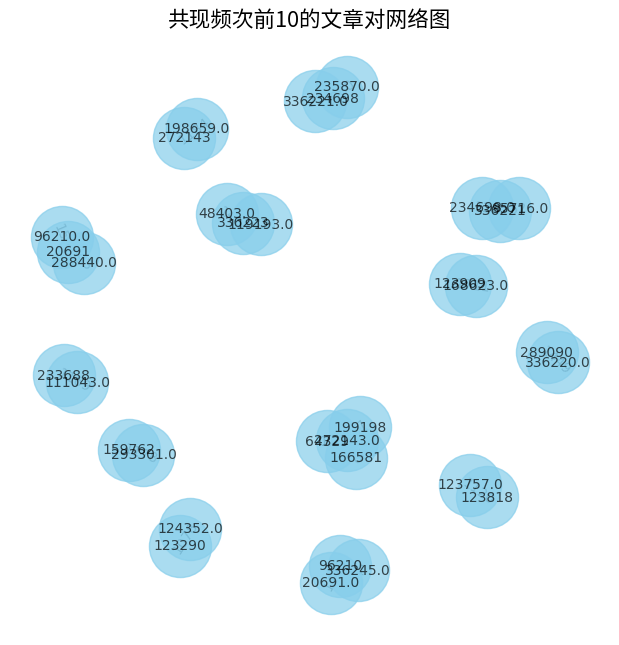

In [ ]:
# Get the top 20 co-occurrence pairs of articles
top_20_pairs = union_item.nlargest(20, 'count')

import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.from_pandas_edgelist(top_20_pairs, 'click_article_id', 'next_item', ['count'])

# Set plot parameters
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G)  # Choose layout
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_color='black', edge_color='gray', alpha=0.7)

# Draw edge labels showing co-occurrence frequency
labels = nx.get_edge_attributes(G, 'count')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Set title
plt.title('Network Graph of the Top 10 Co-occurrence Pairs')
plt.show()


In [ ]:
pair_detail = item_df[item_df['click_article_id'].isin(set(top_20_pairs['click_article_id'].astype(float).astype(int)) | set(top_20_pairs['next_item'].astype(float).astype(int)))]
pair_detail

,click_article_id,category_id,created_at_ts,words_count,created_at,year
20691,20691,9,1507826236000,226,2017-10-12 16:37:16,2017
48403,48403,92,1507563541000,265,2017-10-09 15:39:01,2017
64329,64329,134,1506970055000,199,2017-10-02 18:47:35,2017
95716,95716,209,1507584182000,222,2017-10-09 21:23:02,2017
96210,96210,209,1507798791000,274,2017-10-12 08:59:51,2017
111043,111043,231,1507732818000,195,2017-10-11 14:40:18,2017
119193,119193,247,1507565823000,296,2017-10-09 16:17:03,2017
123290,123290,250,1507224971000,201,2017-10-05 17:36:11,2017
123757,123757,250,1507223128000,194,2017-10-05 17:05:28,2017
123818,123818,250,1507220064000,220,2017-10-05 16:14:24,2017


### News Article Information

In [ ]:
#Occurrences of Different Types of News
user_click_merge['category_id'].value_counts()

,count
category_id,
281,179455
375,152587
250,94229
412,92587
437,90056
...,...
116,1
229,1
318,1


### User Preferences for News Types
this feature for measuring User interest

In [ ]:
user_interest_count = user_click_merge.groupby('user_id')['category_id'].nunique()
user_interest_count

,category_id
user_id,
0,2
1,2
2,2
3,2
4,2
...,...
249995,18
249996,1
249997,4


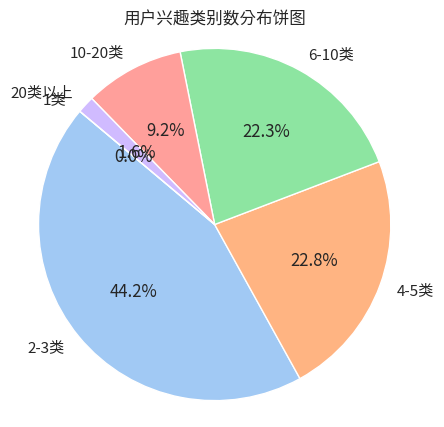

In [ ]:
interest_bins = [0, 1, 3, 5, 10, 20, float('inf')]
labels = ['Category 1', 'Categories 2-3', 'Categories 4-5', 'Categories 6-10', 'Categories 10-20', 'Above 20 Categories']
interest_categories = pd.cut(user_interest_count, bins=interest_bins, labels=labels, right=False)

plt.figure(figsize=(5, 5))
interest_distribution = interest_categories.value_counts()
plt.pie(interest_distribution, labels=interest_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('User Interest Category Distribution Pie Chart')
plt.axis('equal')  # Keep the pie chart circular
plt.show()


From the above chart, it can be observed that a small number of users have a very broad range of reading types, while most users fall below 20 news types

### Analyze the Timing of User Clicks on News articles

In [ ]:
def mean_diff_time_func(df, col):
    # Convert the timestamp to datetime format
    df[col] = pd.to_datetime(df[col], unit='ms')  # Assuming the timestamp is in milliseconds

    # Calculate the previous timestamp
    df['time_shift1'] = df[col].shift(1)

    # Calculate the time difference and convert it to minutes
    df['diff_time'] = (df[col] - df['time_shift1']).dt.total_seconds() / 60

    return df['diff_time'].mean()


# First, sort the data by user and click timestamp
user_click_merge_sorted = user_click_merge.sort_values(by=['user_id', 'click_timestamp'])

# Then, filter out users with more than 2 clicks
filtered_users = user_click_merge_sorted.groupby('user_id').filter(lambda x: len(x) > 2)

# Calculate the mean time difference between clicks for each user
mean_diff_click_time = filtered_users.groupby('user_id').apply(lambda x: mean_diff_time_func(x, 'click_timestamp'))


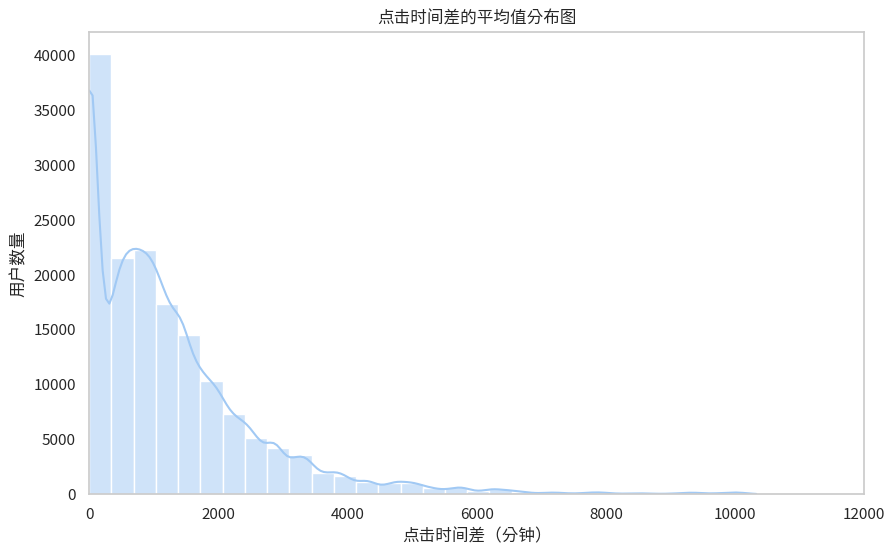

In [ ]:
mean_diff_click_time_df = mean_diff_click_time.reset_index()

# Plot the distribution graph
plt.figure(figsize=(10, 6))
sns.histplot(mean_diff_click_time_df[0], bins=30, kde=True)  # Use kde=True to overlay the kernel density estimate curve
plt.title('Distribution of Average Time Difference Between Clicks')
plt.xlabel('Time Difference Between Clicks (Minutes)')
plt.xlim(0, 12000)
plt.ylabel('Number of Users')
plt.grid()
plt.show()


From the plot, it can be observed that the time differences between clicks on articles vary across different users.

## Summary

Through the data analysis process, we have identified several key insights that will greatly assist us in subsequent feature engineering and analysis:

1. **Unique Users:**  
   The user IDs in the training set and test set do not overlap, meaning that the users in the test set are new to the model. This indicates the need to address the *cold-start* problem during testing, such as how to recommend content to new users.

2. **User Behavior Characteristics:**  
   - The minimum number of article clicks by a user in the training set is 2, while in the test set, it is 1. This suggests sparser user behavior in the test set, which requires the model to handle robustness issues.  
   - Users show repetitive clicks on articles, but this behavior only occurs within the training set. Tracking the number of repeated clicks per article can serve as an important user behavior feature.

3. **Diversity in Click Environment:**  
   A single user may engage with content across different environments. For feature engineering, statistical metrics like the variance in click times or the diversity of devices used can be incorporated to reflect the click environment.

4. **Click Count Features:**  
   - The number of clicks varies significantly across users. This variation can be used to gauge user *activity levels*. Features such as average click count or the distribution of clicks can be generated.  
   - Similarly, articles show varied click frequencies, indicating their *popularity*. Metrics like average article clicks or click distribution can be leveraged to reflect article popularity.

5. **Correlation with User’s Historical Behavior:**  
   The articles a user reads are strongly related to their previously clicked content. Features based on the similarity between newly recommended content and the user’s history (e.g., similarity to recently clicked articles) can improve recommendation accuracy.

6. **Article Attribute Features:**  
   - There is significant variation in the word count of articles clicked by users. This can reflect a user's preference for article length. Features such as average word count or word count distribution can be used to capture these preferences.  
   - Users also demonstrate varied preferences in article topics. Capturing the distribution of topics a user interacts with can reveal their content preferences.

7. **Time-based Features:**  
   The time gaps between article clicks differ across users, reflecting their preference for content timeliness. Features like average time gap or time gap distribution can help understand user behavior patterns better.

---

By applying the insights above, we can enhance our feature engineering process and extract meaningful hidden patterns from the data, improving the performance of subsequent models.